In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/kaggle/input/healthcare/stroke_healhcare.csv")

#https://www.kaggle.com/code/rishabh057/healthcare-dataset-stroke-data

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
missing = df.isnull().sum()
missing

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

/tmp/ipykernel_33/3594416367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [ ]:
missing1 = df.isnull().sum()
missing1

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
df = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df[['avg_glucose_level', 'bmi', 'age', 'id']] = scaler.fit_transform(df[['avg_glucose_level', 'bmi', 'age', 'id']])

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   float64
 1   age                             5110 non-null   float64
 2   avg_glucose_level               5110 non-null   float64
 3   bmi                             5110 non-null   float64
 4   gender_Female                   5110 non-null   bool   
 5   gender_Male                     5110 non-null   bool   
 6   gender_Other                    5110 non-null   bool   
 7   hypertension_0                  5110 non-null   bool   
 8   hypertension_1                  5110 non-null   bool   
 9   heart_disease_0                 5110 non-null   bool   
 10  heart_disease_1                 5110 non-null   bool   
 11  ever_married_No                 5110 non-null   bool   
 12  ever_married_Yes                51

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'datetime64[ns]'])

In [ ]:
corr_matrix = numeric_cols.corr()

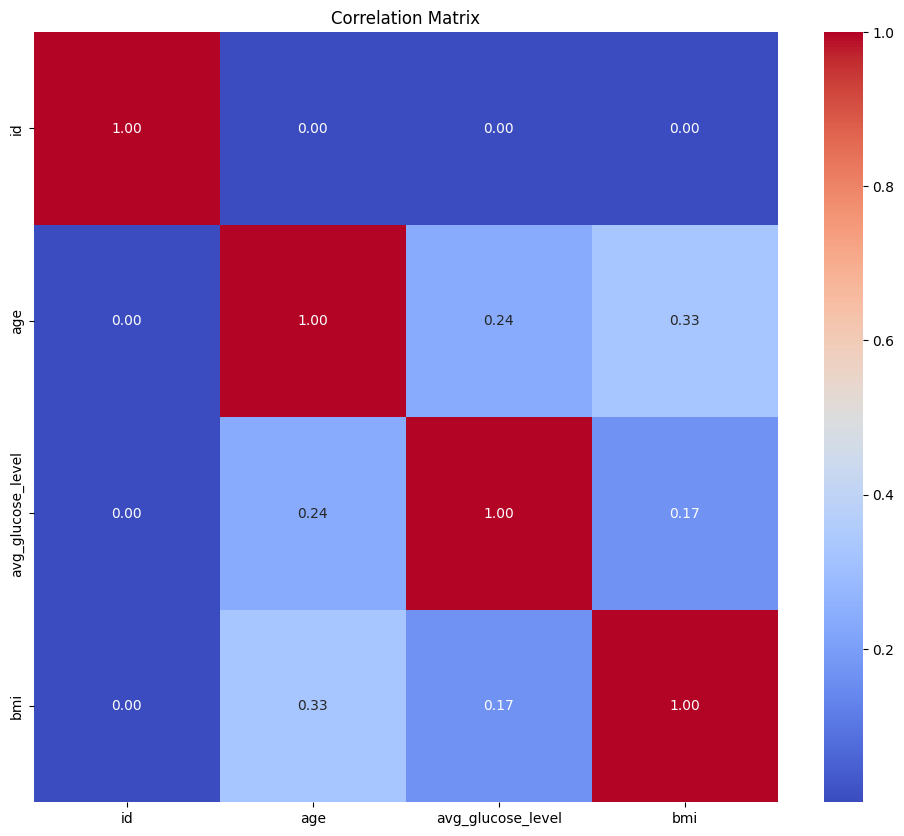

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()